### Analyze peak center resolution and methylation decay (separate L and R)
### At the strongest peaks, what's the achievable resolution
#### Annie Maslan
#### 06.27.21
##### Call peaks in quartile 4. For reads with peak, what is the distance from the motif center?

In [1]:
import os
import numpy as np
import pandas as pd

# plotting & display imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
from scipy import signal
from scipy.optimize import curve_fit
import scipy.stats
import itertools

In [2]:
out = 'out'

In [3]:
ctcf_mA = pd.read_csv('ctcf_allquart4_all_data_mA.csv')

In [4]:
ctcf_mA.head()

,read_name,strand,pos,quality,mod
0,37b4ab41-3993-474f-aade-62aa0d8d752c,-,-988,0,A+Y
1,37b4ab41-3993-474f-aade-62aa0d8d752c,-,-983,0,A+Y
2,37b4ab41-3993-474f-aade-62aa0d8d752c,-,-982,0,A+Y
3,37b4ab41-3993-474f-aade-62aa0d8d752c,-,-978,0,A+Y
4,37b4ab41-3993-474f-aade-62aa0d8d752c,-,-977,0,A+Y


In [5]:
ctcf_mA.describe()

,pos,quality
count,1.498689e+07,1.498689e+07
mean,-5.166378e+00,5.760401e+00
std,5.793153e+02,2.776282e+01
min,-1.000000e+03,0.000000e+00
25%,-5.080000e+02,0.000000e+00
50%,-1.500000e+01,0.000000e+00
75%,4.980000e+02,0.000000e+00
max,1.000000e+03,2.550000e+02


## analysis of inter-peak distance and m6A decay from motif center

In [91]:
def decay_analysis(A, name):
    mA_90 = A[A['quality'] > 230]
    mA_90['quality'] = 1
    A['presence'] = 1

    mA_90['pos'] = abs(mA_90['pos'])
    A['pos'] = abs(A['pos'])

    mA_90 = pd.pivot_table(mA_90, values = 'quality', columns = 'pos', index='read_name')
    A = pd.pivot_table(A, values = 'presence', columns='pos', index='read_name')

    mA_90_count = mA_90.sum(axis=0)
    A_count = A.sum(axis=0)

    mod_frac = mA_90_count / A_count

    calculate_resolution(mod_frac, name, 10, 0.001, 1)

In [92]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [93]:
def calculate_resolution(data, name, a, b, c):
    peaks = sp.signal.find_peaks(data, distance=140)
    p = peaks[0]
    diff_list = []
    for x, y in zip(p[0::], p[1::]):
        diff_list.append(y-x)
    print('peaks: ', str(p))
    print('peak differences: ', str(diff_list))
    subset_peaks = data.iloc[peaks[0]]
    popt, pcov = curve_fit(func, subset_peaks.index, subset_peaks.values, p0=[a, b, c])
    fig = plt.figure()
    sns.lineplot(data=data, color='#053C5E')
    plt.plot(data.index, func(data.index, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt), color='#5E747F');
    plt.legend()
    plt.show()
    half_life = np.log((subset_peaks.values[0]/2 - popt[2])/popt[0])/-popt[1]
    decay_const = 1/popt[1]
    fig.savefig(out + '/' + name + '_exp_fit.png', dpi=300)
    print('half life:', half_life)
    print('decay constant:', decay_const)

/Users/annie/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/annie/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


peaks:  [ 38 233 407 582 788 982]
peak differences:  [195, 174, 175, 206, 194]


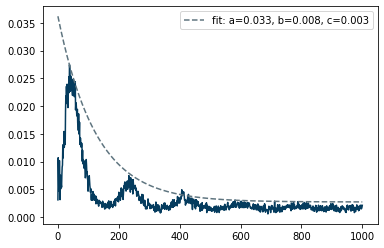

half life: 138.8115960502252
decay constant: 124.874133058867


In [94]:
decay_analysis(ctcf_mA, 'CTCF_meg')

## Analysis of % reads with mA by decile

In [97]:
out_decile = 'out'

In [99]:
ctcf_q10 = pd.read_csv('meg_CTCF_CTCF_q10_all_data_mA.csv')
ctcf_q9 = pd.read_csv('meg_CTCF_CTCF_q9_all_data_mA.csv')
ctcf_q8 = pd.read_csv('meg_CTCF_CTCF_q8_all_data_mA.csv')
ctcf_q7 = pd.read_csv('meg_CTCF_CTCF_q7_all_data_mA.csv')
ctcf_q6 = pd.read_csv('meg_CTCF_CTCF_q6_all_data_mA.csv')
ctcf_q5 = pd.read_csv('meg_CTCF_CTCF_q5_all_data_mA.csv')
ctcf_q4 = pd.read_csv('meg_CTCF_CTCF_q4_all_data_mA.csv')
ctcf_q3 = pd.read_csv('meg_CTCF_CTCF_q3_all_data_mA.csv')
ctcf_q2 = pd.read_csv('meg_CTCF_CTCF_q2_all_data_mA.csv')
ctcf_q1 = pd.read_csv('meg_CTCF_CTCF_1_all_data_mA.csv')

In [110]:
igg_q10 = pd.read_csv('meg_IgG_CTCF_q10_all_data_mA.csv')
igg_q9 = pd.read_csv('meg_IgG_CTCF_q9_all_data_mA.csv')
igg_q8 = pd.read_csv('meg_IgG_CTCF_q8_all_data_mA.csv')
igg_q7 = pd.read_csv('meg_IgG_CTCF_q7_all_data_mA.csv')
igg_q6 = pd.read_csv('meg_IgG_CTCF_q6_all_data_mA.csv')
igg_q5 = pd.read_csv('meg_IgG_CTCF_q5_all_data_mA.csv')
igg_q4 = pd.read_csv('meg_IgG_CTCF_q4_all_data_mA.csv')
igg_q3 = pd.read_csv('meg_IgG_CTCF_q3_all_data_mA.csv')
igg_q2 = pd.read_csv('meg_IgG_CTCF_q2_all_data_mA.csv')
igg_q1 = pd.read_csv('meg_IgG_CTCF_q1_all_data_mA.csv')

In [153]:
def calc_frac_peak(data):
    data_peak = data[(data['pos'] >= -100) & (data['pos'] <= 100)]
    data_peak_t90 = data_peak[data_peak['quality'] >= 153]
    return len(data['read_name'].unique()), len(data_peak_t90['read_name'].unique())

In [154]:
all_data = [ctcf_q10,ctcf_q9,ctcf_q8,ctcf_q7,ctcf_q6,ctcf_q5,ctcf_q4,ctcf_q3,ctcf_q2,ctcf_q1]
reads = []
peak_reads = []
frac = []
deciles = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
for d in all_data:
    r, pr = calc_frac_peak(d)
    reads.append(r)
    reads.append(pr)
    frac.append(pr/r)

In [155]:
print(frac)

[0.40158089182919493, 0.3688805203697364, 0.35093956323006603, 0.31967700807479815, 0.294981955662485, 0.28116938950988823, 0.24144503162089578, 0.20406719717064545, 0.16273501241575028, 0.11981848328824504]


In [156]:
all_data_igg = [igg_q10,igg_q9,igg_q8,igg_q7,igg_q6,igg_q5,igg_q4,igg_q3,igg_q2,igg_q1]
reads = []
peak_reads = []
frac_igg = []
for d in all_data_igg:
    r, pr = calc_frac_peak(d)
    reads.append(r)
    reads.append(pr)
    frac_igg.append(pr/r)

In [157]:
print(frac_igg)

[0.023777538957549704, 0.025922909880564605, 0.023862068965517243, 0.020171732315660353, 0.019599723947550034, 0.019497109049347854, 0.015048070224327713, 0.018132242672119974, 0.013902405116085082, 0.015126958400864398]


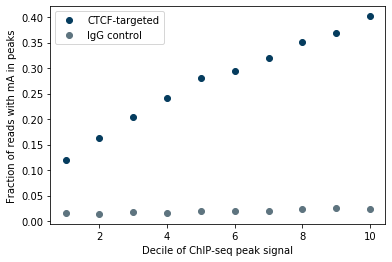

In [160]:
fig = plt.figure()
plt.plot(deciles, frac, 'o', color='#053C5E')
plt.plot(deciles, frac_igg, 'o', color='#5E747F');
plt.ylabel('Fraction of reads with mA in peaks')
plt.xlabel('Decile of ChIP-seq peak signal')
plt.legend(['CTCF-targeted', 'IgG control'])
fig.savefig(out_decile + '/decile_analysis.pdf')